In [8]:
### Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 
from plot_indicators import plot_function


In [17]:
### Load in Stock Data
### Load in Stock Data
def import_stock_data(tickers, start_date):
    # Check if tickers is a list or a single ticker string
    if isinstance(tickers, list):
        data = yf.download(tickers, start = start_date)[['Close', 'High', 'Low']]
    else:
        data = yf.download(tickers, start = start_date)[['Close', 'High', 'Low']]
        data = pd.DataFrame(data)

    # Reset index to make 'Date' a column instead of index
    data.reset_index(inplace = True)
    data['Date'] = pd.to_datetime(data['Date'])

    return data

tickers = ['GOOG', 'AAPL']
start_date = '2024-01-01'
stock_data = import_stock_data(tickers, start_date)
stock_data


[*********************100%%**********************]  2 of 2 completed


Price        Date       Close                    High                     Low  \
Ticker                   AAPL        GOOG        AAPL        GOOG        AAPL   
0      2024-01-02  185.639999  139.559998  188.440002  140.615005  183.889999   
1      2024-01-03  184.250000  140.360001  185.880005  141.089996  183.429993   
2      2024-01-04  181.910004  138.039993  183.089996  140.634995  180.880005   
3      2024-01-05  181.179993  137.389999  182.759995  138.809998  180.169998   
4      2024-01-08  185.559998  140.529999  185.600006  140.639999  181.500000   
..            ...         ...         ...         ...         ...         ...   
73     2024-04-17  168.000000  156.880005  170.649994  158.681000  168.000000   
74     2024-04-18  167.039993  157.460007  168.639999  158.485001  166.550003   
75     2024-04-19  165.000000  155.720001  166.399994  157.990005  164.080002   
76     2024-04-22  165.839996  157.949997  167.259995  159.184998  164.770004   
77     2024-04-23  166.899994  159.919998  167.050003  160.479996  164.929993   

Price               
Ticker        GOOG  
0       137.740005  
1       138.429993  
2       138.009995  
3       136.850006  
4       137.880005  
..             ...  
73      156.134995  
74      156.210007  
75      153.910004  
76      155.660004  
77      157.964996  

[78 rows x 7 columns]

In [18]:
### MACD Function for Multiple Stocks
def get_macd(tickers, df):
    # Initialize empty DataFrame to store MACD data with correct columns
    macd_df = pd.DataFrame(index=df.index, columns=tickers[::-1])  # Reverse the tickers list
    macd_vals = {}

    # Loop for MACD calculation and df population
    for t in tickers:
        # Calculate 12-day Exponential Moving Averages (EMA)
        ema_12 = df['Close'][t].ewm(span=12, adjust=False).mean()
        # Calculate 26-day Exponential Moving Averages (EMA)
        ema_26 = df['Close'][t].ewm(span=26, adjust=False).mean()
        # Calculate MACD line (12-day EMA minus 26-day EMA)
        macd = ema_12 - ema_26
        # Add MACD column to the DataFrame
        macd_df[t] = macd
        # Append last MACD value to macd_vals dictionary
        macd_vals[t] = macd_df[t].iloc[-1]

    return macd_df, macd_vals

# Example usage
tickers = ['GOOG', 'AAPL']
macd_df, macd_vals = get_macd(tickers, stock_data)
print(macd_df.tail())
print("MACD values list: ", macd_vals)

        AAPL      GOOG
73 -1.342586  3.296178
74 -1.550769  3.166312
75 -1.858937  2.889679
76 -2.012186  2.817904
77 -2.024764  2.886708
MACD values list:  {'GOOG': 2.886708132677569, 'AAPL': -2.0247644939728673}


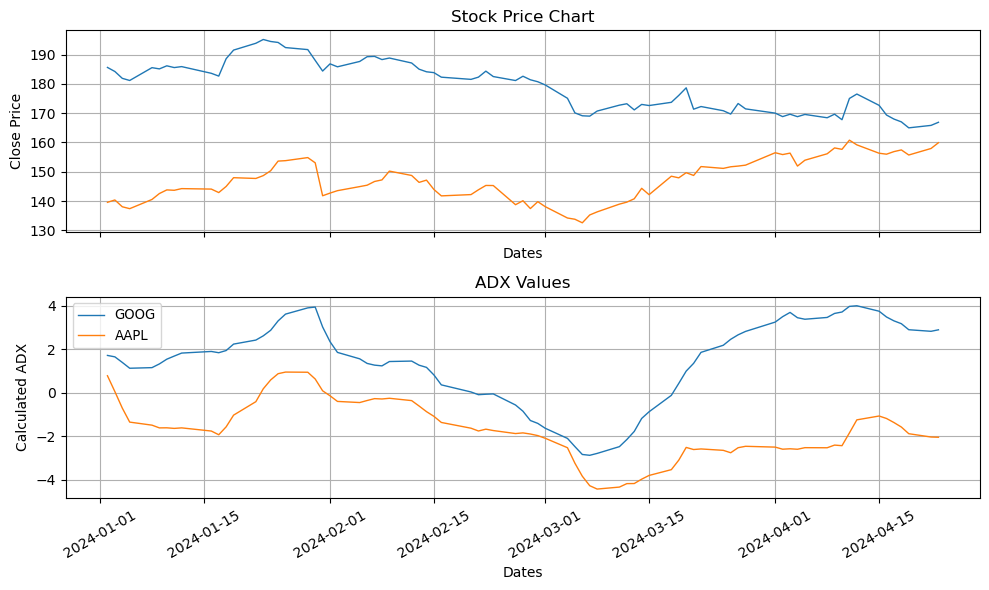

In [13]:
### Plot RSI and Stock Dataframes
plot = plot_function(stock_data, macd_df, tickers)
plot